# Understanding Descriptive Statistics

Import the necessary libraries here:

In [3]:
# Libraries
import pandas as pd
import numpy as np
import scipy as sp


## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [185]:
# your code here
def roll_dice(n):
    lst = []
    for i in range(n):
        lst.append(np.random.randint(1,7))
    return pd.DataFrame(lst, columns = ["results"])

In [227]:
rolls = roll_dice(10).sort_values("results").reset_index(drop=True)
rolls

,results
0,1
1,1
2,2
3,2
4,4
5,4
6,5
7,6
8,6
9,6


#### 2.- Plot the results sorted by value.

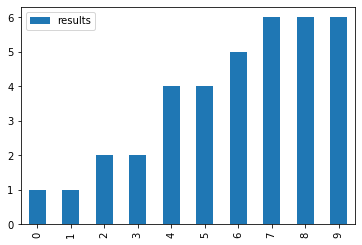

In [228]:
# your code here
rolls.plot.bar()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

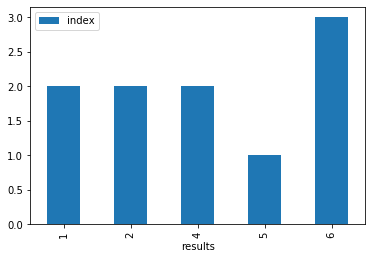

In [229]:
# your code here
# we are not meant to do plots
freq = rolls.reset_index()
freq
freq1 = freq.groupby("results").count()
freq1
freq1.plot(kind="bar")

In [230]:
"""
Ther first plot shows the result for each throw, the second the number of same value results overall. 
If on the bar chart there are two values (x-axis) that scored a one (y-axis), then on the second graph 
the result variable 1 should have a frequency (y -axis) of 2"""

'\nTher first plot shows the result for each throw, the second the number of same value results overall. \nIf on the bar chart there are two values (x-axis) that scored a one (y-axis), then on the second graph \nthe result variable 1 should have a frequency (y -axis) of 2'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [231]:
# your code here
def mean_function(x):
    """input a list of values
    output the median by sum of list/ number of values in lsit"""
    return sum(x)/len(x)
        


#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [232]:
# your code here
# frequency distribution calculated in previous challenge, 
# usign the same data/DF as above
mean_function(freq1["index"])

2.0

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [236]:
# your code here
from math import ceil
def median_function(x):
    """input of sorted list, 
    output of median
    - (len/2)+1 and round up"""
    return x[ceil((len(x))/2)]


In [237]:
rolls.quantile(0.5)

results    4.0
Name: 0.5, dtype: float64

In [238]:
median_function(rolls["results"])


4

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [239]:
rolls.describe()

,results
count,10.000000
mean,3.700000
std,2.057507
min,1.000000
25%,2.000000
50%,4.000000
75%,5.750000
max,6.000000


In [240]:
# your code here

def quartiles_function(x):
    """input of a sorted list, 
    output of UQ, Median, LQ, IQR"""
    median = median_function(x)
    LQ = ceil(len(x)*0.25)
    UQ = round(len(x)*0.75)
    return "LQ:", x[LQ], "median:", x[median], "UQ:", x[UQ], "IQL:", x[UQ]-x[LQ]

In [241]:
quartiles_function(rolls["results"])

('LQ:', 2, 'median:', 4, 'UQ:', 6, 'IQL:', 4)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [243]:
# your code here
rolls2 = pd.read_csv("../data/roll_the_dice_hundred.csv").drop("Unnamed: 0", axis=1)
rolls2.head()

,roll,value
0,0,1
1,1,2
2,2,6
3,3,1
4,4,6


In [254]:
rolls2.describe()

,roll,value
count,100.000000,100.000000
mean,49.500000,3.740000
std,29.011492,1.703354
min,0.000000,1.000000
25%,24.750000,2.000000
50%,49.500000,4.000000
75%,74.250000,5.000000
max,99.000000,6.000000


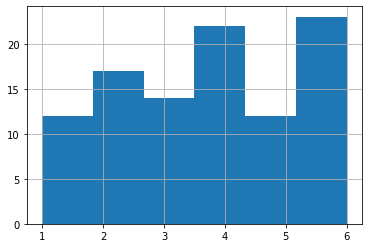

In [266]:
rolls2["value"].hist(bins=6)

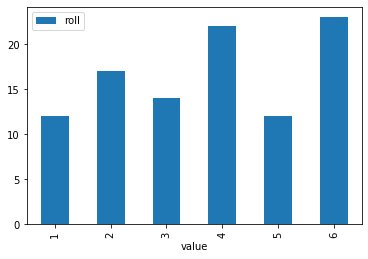

In [265]:
freq2 = rolls2.groupby("value").count()
freq2.plot(kind="bar")

In [ ]:
"""
Looking at the describe, we see that the mean is hihger than the expected 3.5.
The histogramm shows many 4, 6 with 6 being the mode. 
With 100 rolls, a more even distribution is expected (p(x) = 1/6) if the dice is not biast. 
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [253]:
# your code here
# rolls2.describe() - 3.7
mean_function(rolls2["value"])

3.74

#### 3.- Now, calculate the frequency distribution.


In [250]:
# your code here
freq = rolls2["value"].value_counts()
freq

6    23
4    22
2    17
3    14
5    12
1    12
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

In [ ]:
# your code here
# see hsitogram and comments of quesiton 1

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

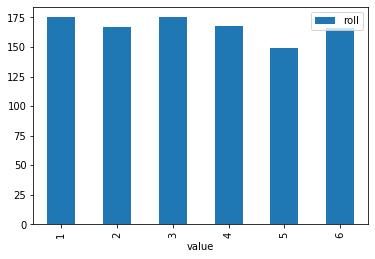

In [267]:
rolls3 = pd.read_csv("../data/roll_the_dice_thousand.csv").drop("Unnamed: 0", axis=1)
rolls3.head()
freq3 = rolls3.groupby("value").count()
freq3.plot(kind="bar")


In [ ]:
"""
Higher sample size leads to distribution coming closer to the expected result
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [34]:
# your code here
ages = pd.read_csv("../data/ages_population.csv")
ages.head()

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0


#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [33]:
# your code here
# ages.describe() - mean: 36.5600, std: 12.8165
print(ages.mean())
print(ages.std())

observation    36.56
dtype: float64
observation    12.8165
dtype: float64


In [ ]:
"""
your comments here
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [36]:
# your code here
ages2 = pd.read_csv("../data/ages_population2.csv")
ages2.head()

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0


####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [37]:
# your code here
# ages2.describe() - mean: 27.155, std: 2.969814
print(ages2.mean())
print(ages2.std())

observation    27.155
dtype: float64
observation    2.969814
dtype: float64


In [ ]:
"""
your comments here
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [38]:
# your code here
ages3 = pd.read_csv("../data/ages_population3.csv")
ages3.head()

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0


#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [39]:
# your code here
# ages3.describe() - mean: 41.989, std: 16.144706
print(ages3.mean())
print(ages3.std())

observation    41.989
dtype: float64
observation    16.144706
dtype: float64


In [40]:
"""
your comments here
"""

'\nyour comments here\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [ ]:
# your code here


In [ ]:
"""
your comments here
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""